# Prosper P2P Loan Analysis

## 1 Introduction
In this notebook, we look at a data set on the Prosper peer-to-peer lending platform. Prosper is a California-based company in the peer-to-peer lending industry, and operates a platform where individuals can either invest in personal loans or request to borrow money. [https://en.wikipedia.org/wiki/Prosper_Marketplace]

The Peer-to-peer lending arose from the wish of individuals to lend money to other individuals without having a financial institution as an intermediary inbetween them. This enables investors to get a higher return on their savings rather than having them on a bank savings account and more importantly having an alternative to traditional bank offerings. It is often also referred to as social lending or crowd lending. As this form of lending is becoming more and more popular, it has become an alternative method of financing and is getting growing public attention. 

It is important to understand that Peer-to-peer websites are connecting borrowers and investors directly. Depending on the creditworthiness of a borrower, websites such as Prosper are setting rates and terms of potential transactions. There's also the possibility to haggle or breaking a borrowing request up into multiple smaller chunks and thereby accepting multiple offers, if a borrowing applicant or lender wishes to do so.


Although there is a multitude of questions one could try to answer using this data set, for this group project, we focus on the following: 

**Can we predict who will be default borrowers?**

In a first step, we will inspect the data set, ...
As the data set comprises around 80 variables, we will then try to reduce dimensionality in order to reduce complexity.
...

In [2]:
# Imports

# Data Analysis in general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Loading the Data Set

In [3]:
df = original_data = pd.read_csv("prosperLoanData.csv")

In [4]:
print(f"Our initial data set comprises {len(df.columns)} variables.")

Our initial data set comprises 81 variables.


Let's have a brief look at them:

In [5]:
pd.set_option("display.max_columns", len(df.columns))
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

## From Business Problem to Machine Learning problem:

1. Looking onto the business problem, the main goal for the user of our model is to generate a high return on investments and in this particular case by avoiding investments that default. In general, this is possible by maximizing the interest rate (=earnings) while minimizing potential defaults (=losses). As peer-to-peer lending is especially risky, we are concentrating in this project onto predicting whether an investment will default.

2. As a general rule, it can be said in portfolio theory, when determining an investment strategy, it is important to diversify. Thus the final goal of this project in terms of machine learning is to make predictions on sets of different loans that are current, which are then combined in our portfolio. The prediction thereby aims to foresee, whether a loan is going to be paid back or if it is going to default (= resulting in a loss). This is equivalent with understanding the business problem. Nevertheless, as we only have information on whether a credit is going to default or not after the loan has actually defaulted ot has been completed, we will focus in our model on this data and are going to keep the current data for a future real world application out of our model.

3. The next step is to check the available data and whether it is fit to create a machine learning model. If the data is insufficient from the data sources we are provided with (in this case: Prosper) it might make sense to search for additional data sources. Acquiring data from third-parties or scraping it from the web are possible solutions. At this point in time, it is also important to check, how frequent data is going to be available (e.g. in real-time, monthly, quarterly, etc.). After some data exploration, we've elaborated that additional data sources are not going to be required.

4. As there is a huge variety of features available, it is important for us to do some data curation. To start off, if not available, it is strongly recommended to do a high level analysis of the features that are available. Next, it is important to explore and understand the data (e.g. which features are similar or correlate strongly with each other; is there a lot of missing data; etc.). Some descriptive statistics help a lot in this step (e.g. a correlation matrix).

5. After understanding and curating the data, the next step is feature engineering. Relevant features in this case would be **e.g. (loan_amnt, loan_status or int_rate)** . Irrelevant features should be dropped, as they most probably influence our model results negatively. As there are no clearly visible rules on when a loan has a higher probability to default, it makes sense to see and handle the problem as a machine learning problem. Visualising the whole process while building an end-to-end pipeline helps the developer to keep track and transparency. At first sight, it might make sense to use a classification algorithm (e.g. logistic regression with supervised learning) as the main goal is to determine whether a loan is defaulting or not. Nevertheless, this is an iterative trial and error process, as e.g. a decision tree might show better results. 

6. With some results obtained, it is now important to evaluate them with e.g. a confusion matrix. Which defaults have been correctly estimated as true negatives and how often has our model been inaccurate in predicting the default (False Positives). Evaluation criterias as the F1-score are very helpful to get an idea of the performance.

7. If we are okay with our model performance so far, it is time to pilot the model. A future user still shouldn't go "all-in" with his/her investments yet and rather test the performance and collect further feedback to improve her model. It is time to interpret and fine-tune. 

8. We have now solved a business and machine learning problem and are able to go "live" with our model. Especially in the beginning, it might make a lot of sense for us or other users to establish an iterative feedback loop, whereas it is possible to further enhance the model with feedback provided from the model's performance and therefore better inform our investment decisions.

# 2 Business Problem Formulation

What is the business problem we try to solve?

**Can we predict who will be default borrowers?** --> elaborate a little bit more on this

Explain why that is a supervised Machine Learning task, that *LoanStatus* is our target variable, which we try to predict. But more on it later, after further inspecting the data set.

# 3 Data Preparation

Let's have a glimpse at the data set and its data quality.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### Drop unnecessary information

After reading the variable descriptions and inspecting the data set and getting a first impression, we can directly drop redundant or completely irrelevant columns:

In [7]:
df.drop(["ListingKey", "ListingNumber", "LoanKey", "LoanNumber"], axis=1, inplace=True)

Dropping variables which would be useful for other research questions


In [8]:
df.drop(["ListingCreationDate", "ClosedDate", "DateCreditPulled", "LoanOriginationDate", "LoanOriginationQuarter", "MemberKey"], 
        axis=1, inplace=True)

## nochmal anschauen: das mit den delinquant loans machen wir ja erst später

Dropping variables which describe the status of a loan at present, or the history of the loan (beyond the scope). We set delinquant loans equal to default and as we later drop all current loans which makes certain columns (i.e.LoanCurrentDaysDelinquent) irrelevant.

In [9]:
df.drop(["LoanCurrentDaysDelinquent", "LoanFirstDefaultedCycleNumber", "LoanMonthsSinceOrigination", "LP_CustomerPayments",
         "LP_CustomerPrincipalPayments", "LP_InterestandFees", "LP_ServiceFees", "LP_CollectionFees", "LP_GrossPrincipalLoss",
         "LP_NetPrincipalLoss", "LP_NonPrincipalRecoverypayments", "FirstRecordedCreditLine"], axis=1, inplace=True)

# unbedingt umschreiben hier --> aber nicht vergessen

am besten schauen, welche von den Analysen man (als Vermutung) gleich jetzt machen könnte.
So können wir den Datensatz gleich am Anfang beträchtlich reduzieren, was ich als relativ günstig ansehe.


I'm going to drop some further columns now that I don't think will help our model too much. Let me explain my thinking. The wide majority of loans were fully funded, and there are other variables (like Investors) capturing similar information, so I think it's safe to drop the PercentFunded variable. BorrowerAPR and LenderYield are both versions of BorrowerRate, just with fees included, so they're unnecessary. CreditGrade and ProsperRating (Alpha) are annoying categorical variables with many proxies already. IncomeRange is also a tricky data type and basically redundant. Occupation could be very interesting, but being such a broad categorical variable it would be incredibly difficult to use. Group affiliation could be an interesting line of inquiry, but I feel like that is probably best left to another investigation into Prosper's grouping practices. Finally, the estimated variables could be used as features, but I feel that since the entire point of this exercise is to outperform Prosper's estimates of risk, it is somewhat contradictory to use their precise estimates in our classifications.

# Setting up target labels to reflect the business problem definition

% NaN: 0.0%


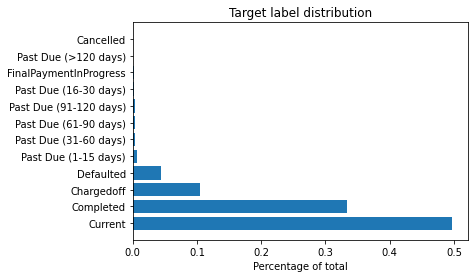

In [10]:
def insights(var_name):
    
    na = df[var_name].isna().sum()
    print(f"% NaN: {(na/len(df)*100).round(2)}%")
    
    index = df[var_name].value_counts(normalize=True).index
    values = df[var_name].value_counts(normalize=True).values
    plt.barh(index, values)
    plt.xlabel("Percentage of total")
    plt.title("Target label distribution")

insights('LoanStatus')

As we can see in the chart, the most common loan status label in the dataset is current.</br>
This indicates loans that are still running normally without any deviations in the paypment at this point in time.</br>
However, since we simply do not know whether these loans will end up as default or completed loans, there is no information in those loan labels that would help us in our classification task.</br>
Therefore, we first drop all rows of the dataset with the label currrent.

In [11]:
df.drop(df[df["LoanStatus"] == "Current"].index, axis = 0, inplace = True)

Second, we need to think about all the other label types, that make up the "tail" of the label distribution.</br>
Those are descriing loans that deviate in their payment schedule.</br>
For those labels we have the same problem as with the current loans, that we do not know what these loans will end up  default or not.</br>
One could argue both ways, on one side loans that are in chargeoff or past due would naturally be considered more likely to end up on the default side of the loans.</br>
On the other side, it is possible that a considerable number of loans in the completed label group, actually went throught a stage of being in past due as well, so the completed labels might actually include previous past due loans.</br>
The problem is we do not know about the characteristic of how the loans evolve over time, so we make the decision at this point to treat cancelled, past due and chargeoff loans as defaulted loans.

In [12]:
df["LoanStatus"] = (df["LoanStatus"] == "Completed").astype(int)

df.head(5)

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanOriginalAmount,MonthlyLoanPayment,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,C,36,1,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,640.0,659.0,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9425,330.43,1.0,0,0,0.0,258
2,HR,36,1,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,480.0,499.0,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3001,123.32,1.0,0,0,0.0,41
11,C,36,1,0.15033,0.1325,0.1225,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,Waiter/Waitress,Full-time,19.0,False,False,NaN,640.0,659.0,2.0,2.0,10.0,1,40.0,3.0,5.0,3.0,2224.0,1.0,0.0,0.0,1220.0,0.32,2580.0,7.0,0.40,0.0,0.27,"$1-24,999",True,1666.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000,33.81,1.0,0,0,0.0,53
12,NaN,36,0,0.17969,0.1435,0.1335,0.1264,0.0524,0.0740,5.0,B,4.0,1,AL,Sales - Retail,Employed,1.0,False,False,NaN,680.0,699.0,9.0,7.0,29.0,8,290.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,8624.0,0.70,3626.0,20.0,1.00,0.0,0.18,"$25,000-49,999",True,2416.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000,137.39,1.0,0,0,0.0,1
15,NaN,36,0,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,5.0,13,FL,Other,Other,121.0,True,False,NaN,700.0,719.0,10.0,9.0,18.0,5,300.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9103.0,0.97,178.0,17.0,0.94,0.0,0.49,"$50,000-74,999",True,5500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000,173.71,1.0,0,0,0.0,10


# Handling NULL values

On the first sight it seems like NAN values might be a problem of many features in our analysis.</br>
Therefore it might be beneficial to determine the percentage of NAN values per label and then think about a threshold at which it does not make sense to use the
feature since we can't impute alternative values for NANs if they're too many

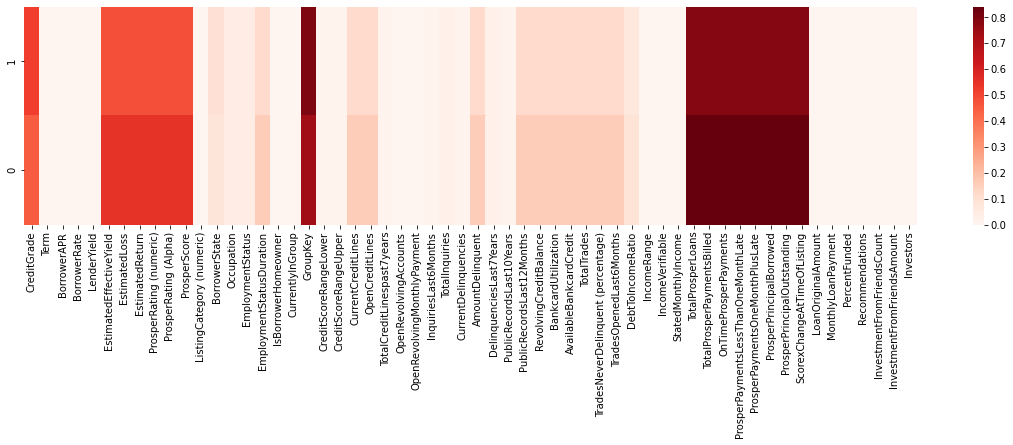

In [13]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

nan_df = pd.DataFrame(index = [1, 0])

for column in df.columns:
    
    if column == "LoanStatus":
        continue
        
    grouped = df.loc[:, [column, "LoanStatus"]].groupby("LoanStatus").apply(get_percentage_missing).drop("LoanStatus", axis = 1)
    nan_df = nan_df.merge(grouped, left_index = True, right_index = True)


# visualizing the percentage of NA values with a heat map.
plt.figure(figsize = (20, 4))
sns.heatmap(nan_df, cmap = "Reds")

As we can see in the heatmap, there are quite a few features that seem problematic in terms of null values share.</br>
All features from "TotalProsperLoans" to "ScorexChangeAtTimeOfListing" show shares of null values above 50 percent across all three labels.</br>
The "GroupKey" feature is another problematic one with well above 60 percent null values, with only null values in the current label group.</br>
The "CreditGrade" feature shows a similar picture, however with a lower fraction of null values of around 40 percent, but with current loans also having null values only.</br>
Furthermore there is a group of features from "EstimatedEffectiveYield" to "Prosperscore" that seem somehow related, since they all show a similar share of null values, around 40-50 percent for defaulted and completed loans, and no null values for current loans.</br>
</br>
We consider all the above mentioned features to have low utility, since the share of null values is siimply to large to reliably impute alternative values.</br>
Therefore, we will drop those features in the further processing.</br>
</br>
There are also a number of features that show null value shares of around 20 percent, for example the "BankcardUtilization".</br>
We consider those features still to be worth to look at in more detail.</br>
One imporant aspect in those features is that the null value share is similar in both the defaulted and the completed label groups.</br>
Therefore, by imputing alternative values for the null values, we are not accounting for one of the labels disproportionally, hence avoid introducing a bias at this point.

### Replacing of Null Values:

In order to avoid the unnecessary loss of data and information and a negative influence on our model results, we've decided to do the following: 
#### Categorical Variables are replaced with a placeholder "Unknown"
#### Missing Numerical Variable values are replaced with the Median

Whereby we are first focussing on variables that are missing less than 30% of their values

In [14]:
print("BorrowerState before Null-count: "+str(df["BorrowerState"].isnull().sum()))

df["BorrowerState"].fillna("Unknown", inplace=True)

print("BorrowerState new Null-count: "+str(df["BorrowerState"].isnull().sum()))

BorrowerState before Null-count: 5515
BorrowerState new Null-count: 0


In [15]:
print("Occupation before Null-count: "+str(df["Occupation"].isnull().sum()))

df["Occupation"].fillna("Unknown", inplace=True)

print("Occupation new Null-count: "+str(df["Occupation"].isnull().sum()))

Occupation before Null-count: 2284
Occupation new Null-count: 0


In [16]:
print("EmploymentStatus before Null-count: "+str(df["EmploymentStatus"].isnull().sum()))

df["EmploymentStatus"].fillna("Unknown", inplace=True)

print("EmploymentStatus new Null-count: "+str(df["EmploymentStatus"].isnull().sum()))

EmploymentStatus before Null-count: 2255
EmploymentStatus new Null-count: 0


In [17]:
print("TotalTrades before Null-count: "+str(df["TotalTrades"].isnull().sum()))

df["TotalTrades"].fillna(df["TotalTrades"].median(), inplace=True)

print("TotalTrades new Null-count: "+str(df["TotalTrades"].isnull().sum()))

TotalTrades before Null-count: 7544
TotalTrades new Null-count: 0


In [18]:
print("TradesNeverDelinquent (percentage) before Null-count: "+str(df["TradesNeverDelinquent (percentage)"].isnull().sum()))

df["TradesNeverDelinquent (percentage)"].fillna(df["TradesNeverDelinquent (percentage)"].median(), inplace=True)

print("TradesNeverDelinquent (percentage) new Null-count: "+str(df["TradesNeverDelinquent (percentage)"].isnull().sum()))

TradesNeverDelinquent (percentage) before Null-count: 7544
TradesNeverDelinquent (percentage) new Null-count: 0


In [19]:
print("TradesOpenedLast6Months before Null-count: "+str(df["TradesOpenedLast6Months"].isnull().sum()))

df["TradesOpenedLast6Months"].fillna(df["TradesOpenedLast6Months"].median(), inplace=True)

print("TradesOpenedLast6Months new Null-count: "+str(df["TradesOpenedLast6Months"].isnull().sum()))

TradesOpenedLast6Months before Null-count: 7544
TradesOpenedLast6Months new Null-count: 0


In [20]:
print("AmountDelinquent before Null-count: "+str(df["AmountDelinquent"].isnull().sum()))

df["AmountDelinquent"].fillna(df["AmountDelinquent"].median(), inplace=True)

print("AmountDelinquent new Null-count: "+str(df["AmountDelinquent"].isnull().sum()))

AmountDelinquent before Null-count: 7622
AmountDelinquent new Null-count: 0


In [21]:
print("TotalInquiries before Null-count: "+str(df["TotalInquiries"].isnull().sum()))

df["TotalInquiries"].fillna(df["TotalInquiries"].median(), inplace=True)

print("TotalInquiries new Null-count: "+str(df["TotalInquiries"].isnull().sum()))

TotalInquiries before Null-count: 1159
TotalInquiries new Null-count: 0


In [22]:
print("InquiriesLast6Months before Null-count: "+str(df["InquiriesLast6Months"].isnull().sum()))

df["InquiriesLast6Months"].fillna(df["InquiriesLast6Months"].median(), inplace=True)

print("InquiriesLast6Months new Null-count: "+str(df["InquiriesLast6Months"].isnull().sum()))

InquiriesLast6Months before Null-count: 697
InquiriesLast6Months new Null-count: 0


In [23]:
print("OpenCreditLines before Null-count: "+str(df["OpenCreditLines"].isnull().sum()))

df["OpenCreditLines"].fillna(df["OpenCreditLines"].median(), inplace=True)

print("OpenCreditLines new Null-count: "+str(df["OpenCreditLines"].isnull().sum()))

OpenCreditLines before Null-count: 7604
OpenCreditLines new Null-count: 0


In [24]:
print("CurrentCreditLines before Null-count: "+str(df["CurrentCreditLines"].isnull().sum()))

df["CurrentCreditLines"].fillna(df["CurrentCreditLines"].median(), inplace=True)

print("CurrentCreditLines new Null-count: "+str(df["CurrentCreditLines"].isnull().sum()))

CurrentCreditLines before Null-count: 7604
CurrentCreditLines new Null-count: 0


In [25]:
print("TotalCreditLinespast7years before Null-count: "+str(df["TotalCreditLinespast7years"].isnull().sum()))

df["TotalCreditLinespast7years"].fillna(df["TotalCreditLinespast7years"].median(), inplace=True)

print("TotalCreditLinespast7years new Null-count: "+str(df["TotalCreditLinespast7years"].isnull().sum()))

TotalCreditLinespast7years before Null-count: 697
TotalCreditLinespast7years new Null-count: 0


In [26]:
print("CurrentDelinquencies before Null-count: "+str(df["CurrentDelinquencies"].isnull().sum()))

df["CurrentDelinquencies"].fillna(df["CurrentDelinquencies"].median(), inplace=True)

print("CurrentDelinquencies new Null-count: "+str(df["CurrentDelinquencies"].isnull().sum()))

CurrentDelinquencies before Null-count: 697
CurrentDelinquencies new Null-count: 0


In [27]:
print("DelinquenciesLast7Years before Null-count: "+str(df["DelinquenciesLast7Years"].isnull().sum()))

df["DelinquenciesLast7Years"].fillna(df["DelinquenciesLast7Years"].median(), inplace=True)

print("DelinquenciesLast7Years new Null-count: "+str(df["DelinquenciesLast7Years"].isnull().sum()))

DelinquenciesLast7Years before Null-count: 990
DelinquenciesLast7Years new Null-count: 0


In [28]:
print("EmploymentStatusDuration before Null-count: "+str(df["EmploymentStatusDuration"].isnull().sum()))

df["EmploymentStatusDuration"].fillna(df["EmploymentStatusDuration"].median(), inplace=True)

print("EmploymentStatusDuration new Null-count: "+str(df["EmploymentStatusDuration"].isnull().sum()))

EmploymentStatusDuration before Null-count: 7615
EmploymentStatusDuration new Null-count: 0


In [29]:
print("PublicRecordsLast10Years before Null-count: "+str(df["PublicRecordsLast10Years"].isnull().sum()))

df["PublicRecordsLast10Years"].fillna(df["PublicRecordsLast10Years"].median(), inplace=True)

print("PublicRecordsLast10Years new Null-count: "+str(df["PublicRecordsLast10Years"].isnull().sum()))

PublicRecordsLast10Years before Null-count: 697
PublicRecordsLast10Years new Null-count: 0


In [30]:
print("PublicRecordsLast12Months before Null-count: "+str(df["PublicRecordsLast12Months"].isnull().sum()))

df["PublicRecordsLast12Months"].fillna(df["PublicRecordsLast12Months"].median(), inplace=True)

print("PublicRecordsLast12Months new Null-count: "+str(df["PublicRecordsLast12Months"].isnull().sum()))

PublicRecordsLast12Months before Null-count: 7604
PublicRecordsLast12Months new Null-count: 0


In [31]:
print("RevolvingCreditBalance before Null-count: "+str(df["RevolvingCreditBalance"].isnull().sum()))

df["RevolvingCreditBalance"].fillna(df["RevolvingCreditBalance"].median(), inplace=True)

print("RevolvingCreditBalance new Null-count: "+str(df["RevolvingCreditBalance"].isnull().sum()))

RevolvingCreditBalance before Null-count: 7604
RevolvingCreditBalance new Null-count: 0


In [32]:
print("BankcardUtilization before Null-count: "+str(df["BankcardUtilization"].isnull().sum()))

df["BankcardUtilization"].fillna(df["BankcardUtilization"].median(), inplace=True)

print("BankcardUtilization new Null-count: "+str(df["BankcardUtilization"].isnull().sum()))

BankcardUtilization before Null-count: 7604
BankcardUtilization new Null-count: 0


In [33]:
print("AvailableBankcardCredit before Null-count: "+str(df["AvailableBankcardCredit"].isnull().sum()))

df["AvailableBankcardCredit"].fillna(df["AvailableBankcardCredit"].median(), inplace=True)

print("AvailableBankcardCredit new Null-count: "+str(df["AvailableBankcardCredit"].isnull().sum()))

AvailableBankcardCredit before Null-count: 7544
AvailableBankcardCredit new Null-count: 0


In [34]:
df.isnull().sum()

CreditGrade                            28408
Term                                       0
LoanStatus                                 0
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ProsperScore                           29084
ListingCategory (numeric)                  0
BorrowerState                              0
Occupation                                 0
EmploymentStatus                           0
EmploymentStatusDuration                   0
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
GroupKey                               44642
CreditScoreRangeLower                    591
CreditScoreRangeUpper                    591
CurrentCre

#### Checking on the Debt-Income Ratio

While checking in on the Debt Income Ratio, we've realised that both the required debt and income data should be available. After some further checks, it has been clear that the missing data points in the Ratio variable arose from unverifiable Income data. To fill up this missing data points, we add 1 Dollar to accounts with 0 Dollar /month incomes

In [35]:
df_debt_income_ratio_nulls  = df[df["DebtToIncomeRatio"].isnull()]

df_debt_income_ratio_nulls["MonthlyLoanPayment"].isnull().sum(), df_debt_income_ratio_nulls["StatedMonthlyIncome"].isnull().sum()

(0, 0)

In [36]:
df_debt_income_ratio_nulls["IncomeVerifiable"][:10]

78     False
100    False
103    False
105    False
108    False
131    False
170    False
185    False
186    False
218    False
Name: IncomeVerifiable, dtype: bool

In [37]:

df["DebtToIncomeRatio"].fillna(df["MonthlyLoanPayment"] / (df["StatedMonthlyIncome"] + 1), inplace = True)

df["DebtToIncomeRatio"].isnull().sum()

0

#### Filling up the missing Borrower APR's

As some loans were missing an APR value, we are going to replace the missing values with median difference of the borrower rate and fees (as the APR is equal to them). Afterwards, this value is added the borrower rate of the data points which are missing an APR. 

In [38]:
borrower_fees = df["BorrowerAPR"] - df["BorrowerRate"]
print("Borrower APR median: " + str(borrower_fees.median()))
print("Borrower APR before Null-count: "+str(df["BorrowerAPR"].isnull().sum()))

df["BorrowerAPR"].fillna(df["BorrowerRate"] + borrower_fees.median(), inplace=True)

print("Borrower APR new Null-count: "+str(df["BorrowerAPR"].isnull().sum()))

Borrower APR median: 0.02160999999999999
Borrower APR before Null-count: 25
Borrower APR new Null-count: 0


### EstimatedReturn and Estimated Loss

In [39]:
df["EstimatedLoss"].fillna(df["EstimatedLoss"].median(), inplace=True)

df["EstimatedLoss"].isnull().sum()


print("EstimatedReturn NULL-count before: "+str(df["EstimatedReturn"].isnull().sum()))

df["EstimatedReturn"].fillna(df["EstimatedEffectiveYield"] - df["EstimatedLoss"], inplace=True)

print("EstimatedReturn NULL-count after: "+str(df["EstimatedReturn"].isnull().sum()))

EstimatedReturn NULL-count before: 29084
EstimatedReturn NULL-count after: 29084


### ProsperScore

In [40]:
#df["ProsperRating (numeric)"].fillna(df["ProsperRating (numeric)"].median(), inplace=True)
#df["ProsperRating (numeric)"].isnull().sum()

print("ProsperScore NULL-count before: "+str(df["ProsperScore"].isnull().sum()))

df["ProsperScore"].fillna(df["ProsperScore"].median(), inplace=True)

print("PropserScore NULL-count after: "+str(df["ProsperScore"].isnull().sum()))

ProsperScore NULL-count before: 29084
PropserScore NULL-count after: 0


In [41]:
estimated_loss_from_fees = df["BorrowerRate"] - df["EstimatedEffectiveYield"]
estimated_loss_from_fees.median()

print("EstimatedEffectiveYield NULL-count before: "+str(df["EstimatedEffectiveYield"].isnull().sum()))

df["EstimatedEffectiveYield"].fillna(df["BorrowerRate"] - estimated_loss_from_fees.median(), inplace=True)

print("EstimatedEffectiveYield NULL-count after: "+str(df["EstimatedEffectiveYield"].isnull().sum()))

EstimatedEffectiveYield NULL-count before: 29084
EstimatedEffectiveYield NULL-count after: 0


There are quite a few variables related to the performance history of the loan and the prosper history of the customer.</br>
Since those variables describe events, like a payment that is less than one month late, we think it is reasonable to fill missing values for those "Prosper" variables with 0.</br>
This would then indicate, that none of those events has happened for the nan loans, which is a reasonable assumption rather than assuming a large scale failure to record those events for the nan loans.

In [42]:
prosper_vars = ["TotalProsperLoans","TotalProsperPaymentsBilled", "OnTimeProsperPayments", "ProsperPaymentsLessThanOneMonthLate",
                "ProsperPaymentsOneMonthPlusLate", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

df[prosper_vars] = df[prosper_vars].fillna(0)

df.isnull().sum()

CreditGrade                            28408
Term                                       0
LoanStatus                                 0
BorrowerAPR                                0
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                    0
EstimatedLoss                              0
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ProsperScore                               0
ListingCategory (numeric)                  0
BorrowerState                              0
Occupation                                 0
EmploymentStatus                           0
EmploymentStatusDuration                   0
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
GroupKey                               44642
CreditScoreRangeLower                    591
CreditScoreRangeUpper                    591
CurrentCre

There are still quite a few features left that have considerable amounts of null values.</br>
We were thinking about a similar median-inducing procedure for those but arrived at the conlusion, that above a certain threshold of nan value counts, it doesn't really make sense to imply such values for those features.</br>
Therefore, we drop all features at this point that have still more than 30 percent missing values.

In [43]:
nan_df = pd.DataFrame(index = [1, 0])

for column in df.columns:
    
    if column == "LoanStatus":
        continue
        
    grouped = df.loc[:, [column, "LoanStatus"]].groupby("LoanStatus").apply(get_percentage_missing).drop("LoanStatus", axis = 1)
    nan_df = nan_df.merge(grouped, left_index = True, right_index = True)

bad_features = nan_df[nan_df.columns[(nan_df>0.3).any()]].columns
bad_features

Index(['CreditGrade', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'GroupKey', 'ScorexChangeAtTimeOfListing'],
      dtype='object')

In [44]:
# these are the features with low utility due to the large fraction of null values, let's drop them from the original dataset

df.drop(list(bad_features), axis = 1, inplace = True)

In [45]:
df.isnull().sum()

Term                                     0
LoanStatus                               0
BorrowerAPR                              0
BorrowerRate                             0
LenderYield                              0
EstimatedEffectiveYield                  0
EstimatedLoss                            0
ProsperScore                             0
ListingCategory (numeric)                0
BorrowerState                            0
Occupation                               0
EmploymentStatus                         0
EmploymentStatusDuration                 0
IsBorrowerHomeowner                      0
CurrentlyInGroup                         0
CreditScoreRangeLower                  591
CreditScoreRangeUpper                  591
CurrentCreditLines                       0
OpenCreditLines                          0
TotalCreditLinespast7years               0
OpenRevolvingAccounts                    0
OpenRevolvingMonthlyPayment              0
InquiriesLast6Months                     0
TotalInquir

# Checking the distribution of the remaining features

In the following section we want to look into more detail on the distribution of the features, to check for any obvious problems and whether we can solve them.</br>
We have to plot all categorical features separately, since the plotting function df.hist() won't be able to handle both.</br>
Same applies to the boolean features.

## Numeric features

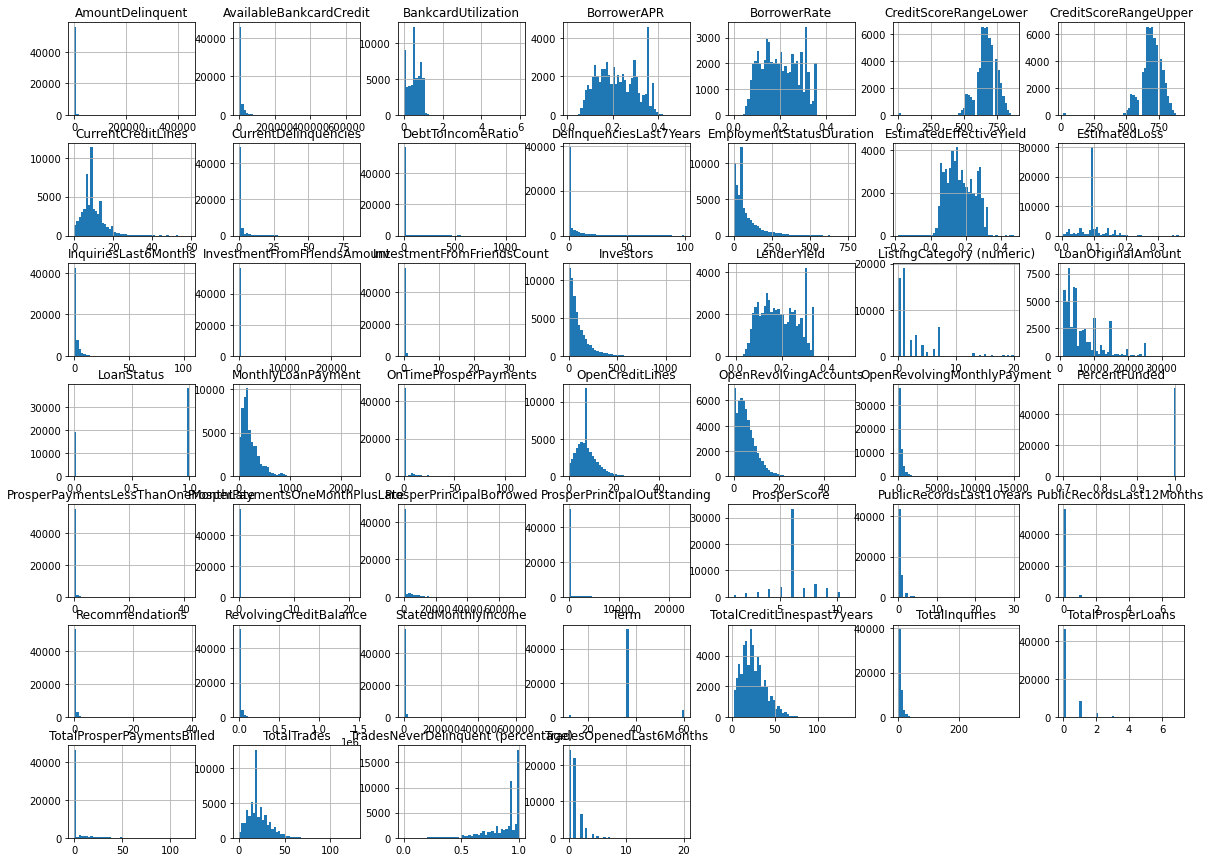

In [46]:
# We can just filter out the boolean columns since the .hist() method won't plot categorical columns anyway.

non_bool_col = [i for i in df.columns if type(df[i][0]) != np.bool_]


df.loc[:, non_bool_col].hist(bins=50, figsize=(20,15))

plt.show()

As we can see in the histograms, there are a lot of features which are very skewed, like the "TradesOpenedLastMonths" or the "Recommendations".</br>
This indicates that these features are not really continuous but rather of categorical nature, with only a few catgories available, like Short-, Medium-, and Long-Term lonas.

Let's look in more detail into the difference some of the features make on our target label.

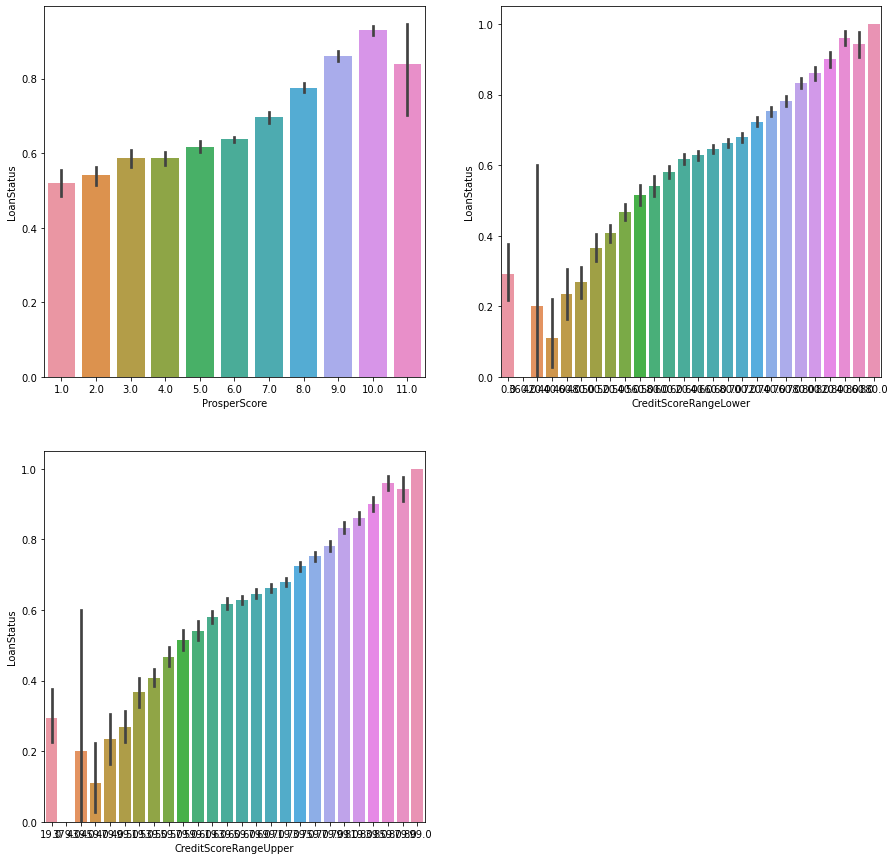

In [47]:
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)
ax2 = fig.add_subplot(221)
sns.barplot(x="ProsperScore", y="LoanStatus", data=df)

ax3 = fig.add_subplot(222)
sns.barplot(x="CreditScoreRangeLower", y="LoanStatus", data=df)

ax4 = fig.add_subplot(223)
sns.barplot(x="CreditScoreRangeUpper", y="LoanStatus", data=df)

Looking onto the credit scores, we can see that it is doing a good job in predicting defaults, with better ratings defaulting less frequently. As the CreditScoreRangerLower and -Upper seem to be constant, we've double checked that and afterwards removed the CreditScoreRangeUpper and renamed the lower bound to Credit Score.

In [48]:
credit_score_range = df["CreditScoreRangeUpper"] - df["CreditScoreRangeLower"]

credit_score_range.value_counts()

19.0    56770
dtype: int64

In [49]:
df.drop("CreditScoreRangeUpper", axis=1, inplace=True)

df.rename(index=str, columns={"CreditScoreRangeLower": "CreditScore"}, inplace=True)

In [50]:
print("CreditScore before Null-count: "+str(df["CreditScore"].isnull().sum()))

df["CreditScore"].fillna(df["CreditScore"].median(), inplace=True)

print("CreditScore new Null-count: "+str(df["CreditScore"].isnull().sum()))

CreditScore before Null-count: 591
CreditScore new Null-count: 0


(0.0, 400.0)

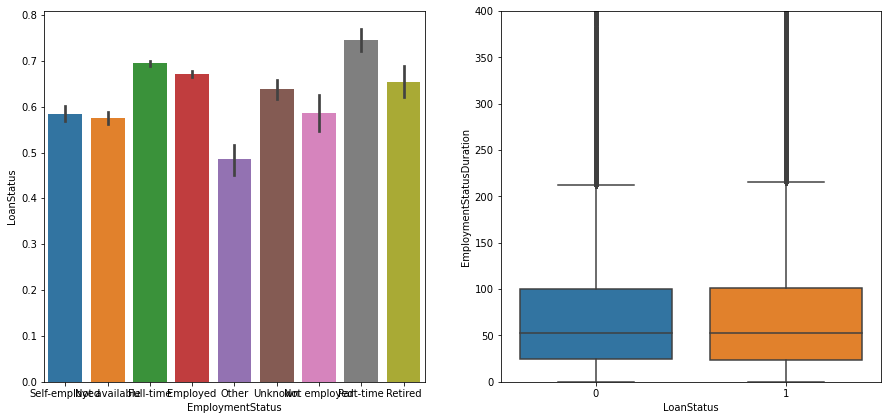

In [51]:
fig = plt.figure()

fig.set_figheight(15)
fig.set_figwidth(15)
ax1 = fig.add_subplot(221)
sns.barplot(x="EmploymentStatus", y="LoanStatus", data=df)

ax2 = fig.add_subplot(222)
sns.boxplot(x="LoanStatus", y="EmploymentStatusDuration", data=df).set_ylim([0,400])

In [52]:
from scipy import stats as st

delinquency = ["CurrentDelinquencies", "DelinquenciesLast7Years"]
y = df["LoanStatus"]

for var in delinquency:
    x = df[var]
    r, p = st.pearsonr(x, y)

    print("The correlation between {} and loan default is {}, with a p-value of {}".format(var, r, p))

The correlation between CurrentDelinquencies and loan default is -0.16061533631517377, with a p-value of 0.0
The correlation between DelinquenciesLast7Years and loan default is -0.08484780582636511, with a p-value of 3.9875870505456534e-92


As both Both current and historical delinquency correlate significantly (p < 0.05) with loan status, we thin that especially the current delinquencies can be a very useful feature for us.

## Boolean features

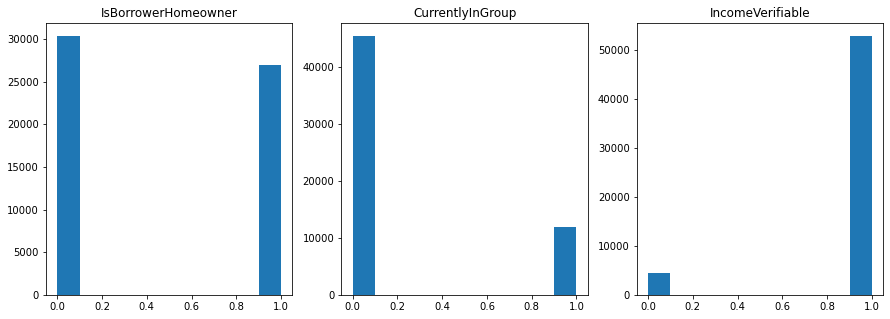

In [53]:
# plotting histograms of boolean features.

bool_col = [i for i in df.columns if type(df[i][0]) == np.bool_]

fig, axes = plt.subplots(nrows=int(len(bool_col)/3), ncols=3, figsize=(15,5))

for column, ax in zip(bool_col, axes):
    ax.hist(df.loc[:, column].mul(1))
    ax.set_title(column)

To have the data types consistent, let's convert the data type to 0 and 1s.

In [54]:
df["IsBorrowerHomeowner"] = df["IsBorrowerHomeowner"].astype(int)
df["IncomeVerifiable"] = df["IncomeVerifiable"].astype(int)
df["CurrentlyInGroup"] = df["CurrentlyInGroup"].astype(int)

In a similar procedure, let's look in more detail into the difference some of the features make on our target label.

Text(0.5, 1.0, 'IncomeVerifiable')

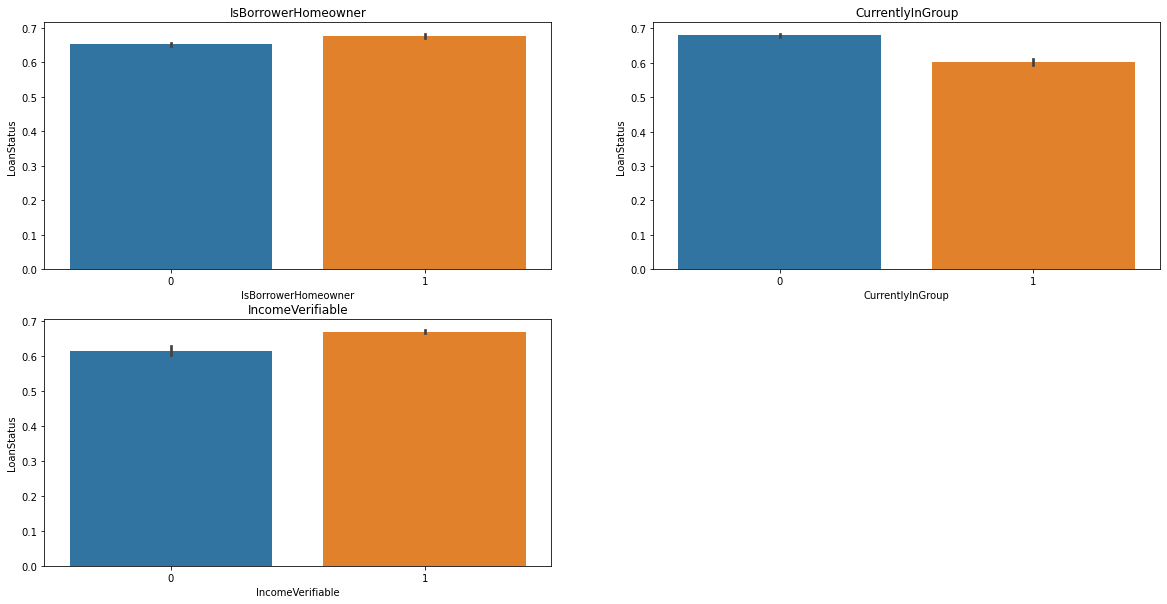

In [55]:
fig = plt.figure(figsize = (20,10))

ax1 = fig.add_subplot(221)
sns.barplot(x="IsBorrowerHomeowner", y="LoanStatus", data=df)
ax1.set_title("IsBorrowerHomeowner")

ax2 = fig.add_subplot(222)
sns.barplot(x="CurrentlyInGroup", y="LoanStatus", data=df)
ax2.set_title("CurrentlyInGroup")

ax3 = fig.add_subplot(223)
sns.barplot(x= "IncomeVerifiable", y="LoanStatus", data=df)
ax3.set_title("IncomeVerifiable")

We can see that there are slight differences in the percentage that default on average for the different boolean features.</br>
Thereby, the biggest difference is in the feature "CurrentlyInGroup", of about 8 percent.</br>
According to the variable dictionary, this feature describes "whether or not the Borrower was in a group at the time the listing was created", we are not entirely sure what that actually means, but since there seems to be some predictive information in the feature we keep it.
</br>
</br>
Due to the marginal difference in default loans and completed loans based on whether the borrower is a homeowner or whether the income is verifiable, we might want to consider dropping those columns.</br>
However, since these are already boolean variables we are also not adding too much of additional dimention to the model, as we don't need to hot-encode it.

# Categorical Variables

The most obvious categorical variables are the ones that already come with the category labels.</br>
Therefore, let's identify them first and then move on to the categorical variables that are currently encoded as numeric.

As already mentioned, there are varaibles that are of categorical nature, but are currently encoded numerically.</br>
In order to avoid implying some wrong sense of cardinality, let's encode them back to the category labels.</br>
However, we only want to do this for the seemingly most imporatant one, to minimize the manual effort.

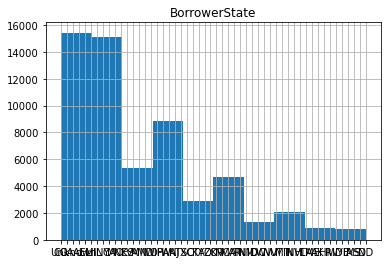

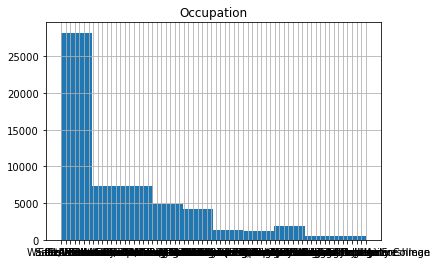

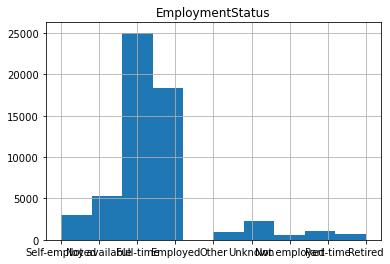

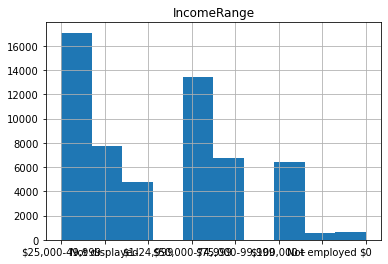

In [56]:
# we still need to look at the categorical features 

cat_col = [i for i in df.columns if type(df[i][0]) == str]

for column in cat_col:
    plt.figure()
    df.loc[:, column].hist()
    plt.title(column)

__Some text needs to be added here that describes the takeaway from the chart__

As we have already done with the boolean variable, let's see if the categorical variables make a difference on the loan outcome.</br>
We start with the Employment Status.

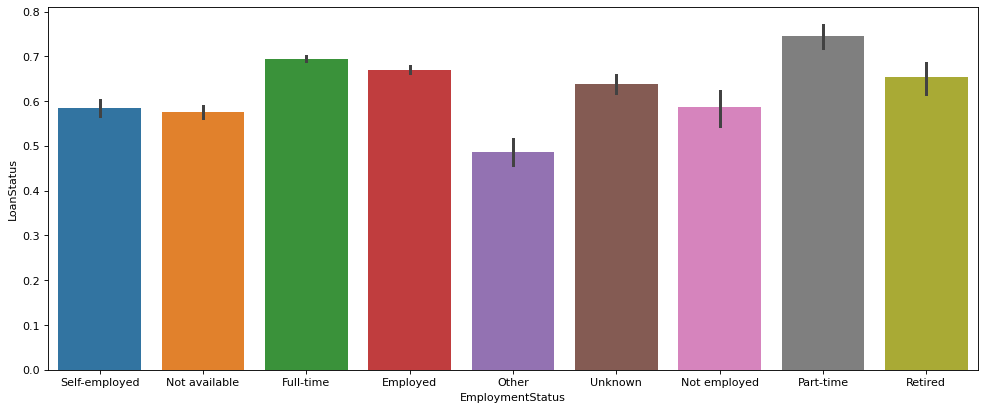

In [57]:
plt.figure(figsize=(15, 6), dpi=80)
sns.barplot(x="EmploymentStatus", y="LoanStatus", data=df)

We can see that there are actually considerable differences in the percentage of loans that get completed between different people with different employment status.</br>
Interestingly, people with part-time employment show the lowest rate of default loans, which is unexpected.</br>
We would have rather expected this characteristic with the Full-time employees, since they have naturally more available income to pay off the loan.

__Occupation__

We can drill down this feature further by looking at the occumation column, let's see if we also have difference in the default/completed distribution here.

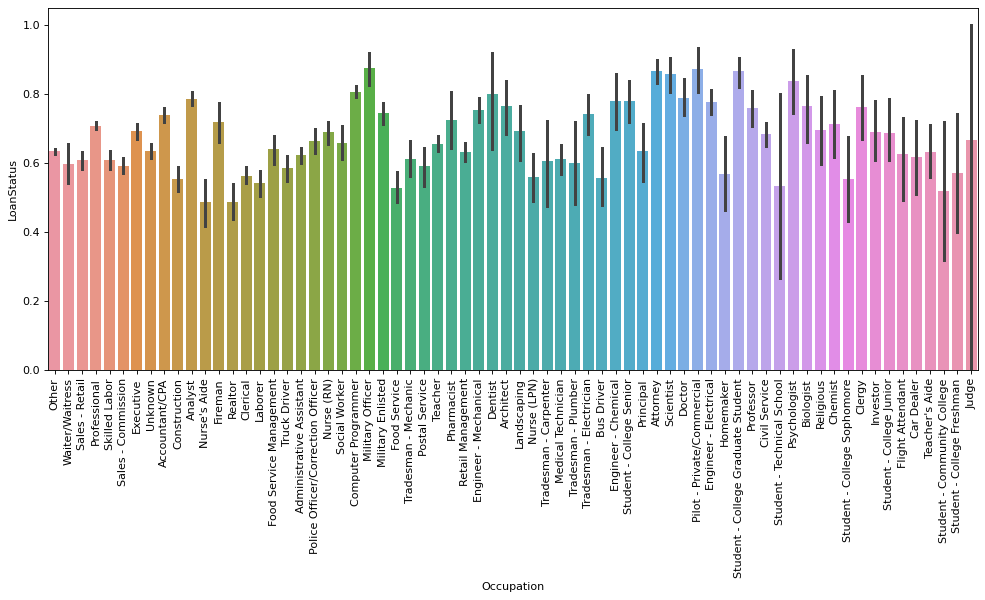

In [58]:
plt.figure(figsize=(15, 6), dpi=80)
sns.barplot(x="Occupation", y="LoanStatus", data=df)
plt.xticks(rotation=90)
plt.show()

As we can see in the chart, the differences in the mean rate of deafault among different occupations is even larger than among people with differnt employment status.</br>
Interestingly, some of the occupations with the lowest share of default loans also show the highest standard deviation of the distribution.


The question is whether we should rather bin this feature into low, medium and high risk occupancies to avoid overfitting and to reduce the dimentionality (All categories would have to be hot-encoded).</br> 
We decided to follow this proposed transformation.

In [59]:
occupation_defaults = df.groupby("Occupation")["LoanStatus"].mean()


low_risk = sorted(occupation_defaults)[46]
mid_risk = sorted(occupation_defaults)[23]



new_occupation = {}

for occupation in occupation_defaults.index:
    
    if mid_risk > occupation_defaults[occupation]:
        v = "OccupationHighRisk"
    elif low_risk > occupation_defaults[occupation] >= mid_risk:
        v = "OccupationMidRisk"
    else:
        v = "OccupationLowRisk"
    new_occupation[occupation] = v

df.replace(to_replace={"Occupation": new_occupation}, inplace=True)
                               
df["Occupation"][:5]

0      OccupationMidRisk
2      OccupationMidRisk
11    OccupationHighRisk
12    OccupationHighRisk
15     OccupationMidRisk
Name: Occupation, dtype: object

__Borrower State__

Next we check the feature "BorrowerState" to see if the geographic location seems to make a difference on people's likelihood to complete the loan.

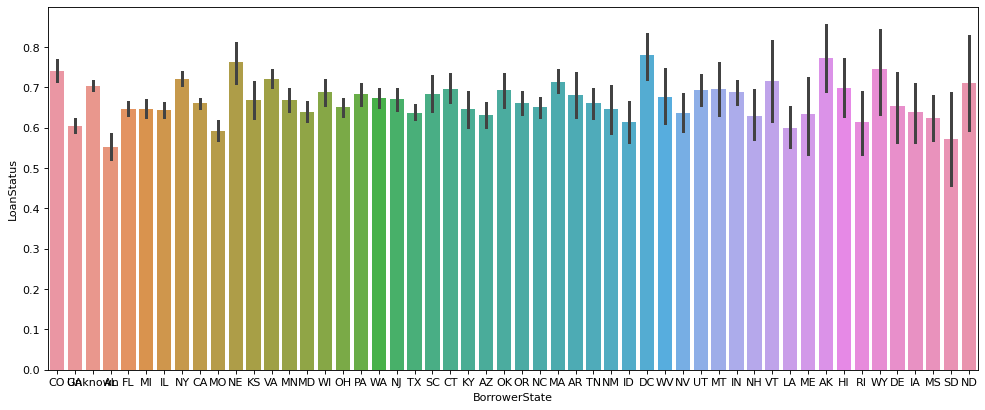

In [60]:
plt.figure(figsize=(15, 6), dpi=80)
sns.barplot(x="BorrowerState", y="LoanStatus", data=df)

In [61]:
state_defaults = df.groupby("BorrowerState")["LoanStatus"].mean()


low_risk = sorted(state_defaults)[40]
mid_risk = sorted(state_defaults)[29]


new_geography = {}

for state in state_defaults.index:
    
    if mid_risk > state_defaults[state]:
        v = "StateHighRisk"
    elif low_risk > state_defaults[state] >= mid_risk:
        v = "StateMidRisk"
    else:
        v = "StateLowRisk"
    new_geography[state] = v

df.replace(to_replace={"BorrowerState": new_geography}, inplace=True)
                               
df["BorrowerState"][:5]

0      StateLowRisk
2     StateHighRisk
11     StateLowRisk
12    StateHighRisk
15    StateHighRisk
Name: BorrowerState, dtype: object

Finally, there is one more categorical variable to look into more detail , that is currently encoded as numerical variable.</br>
In order to avoid an implied cardinality and to better know the definitions of the different types, we transfrom the variable "ListingCategory" back to the category labels.

In [62]:
df.replace(to_replace={"ListingCategory (numeric)": {0: "Unknown", 1: "Debt", 2: "Reno", 3: "Business", 4: "Personal",
                                                                5: "Student", 6: "Auto", 7: "Other", 8: "Baby", 9: "Boat", 
                                                                10: "Cosmetic", 11: "Engagement", 12: "Green", 13: "Household",
                                                                14: "LargePurchase", 15: "Medical", 16: "Motorcycle", 17: "RV",
                                                                18: "Taxes", 19: "Vacation", 20: "Wedding"}}, inplace=True)

df.rename(index=str, columns={"ListingCategory (numeric)": "ListingCategory"}, inplace=True)

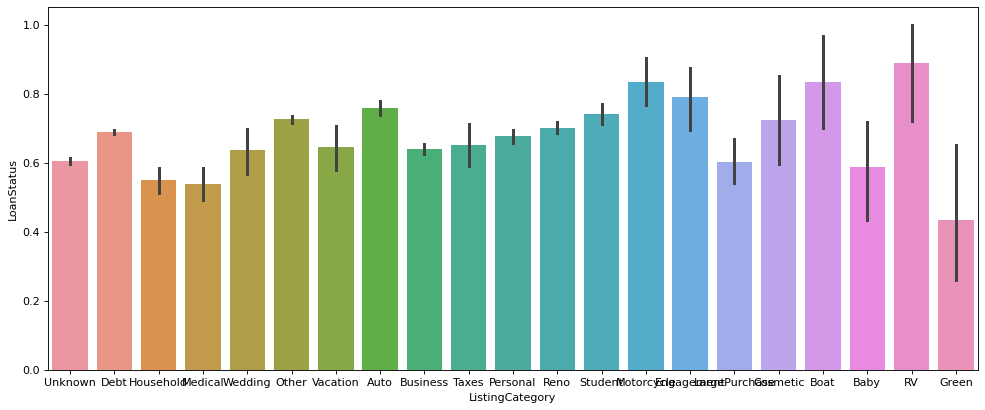

In [63]:
plt.figure(figsize=(15, 6), dpi=80)

sns.barplot(x="ListingCategory", y="LoanStatus", data=df)

As we can see, certain types of loans, or listing categories seem to perform better than other ones.</br>
For example loans of listing type boat are defaulting only about 17 percent of the time, while of the loans that are used for weddings about 36 percent default on average.</br>
Those are already some useful insights.

## Additional considerations

Lastly, we want to take the feature FirstRecordedCreditLine into closer consideration.</br>
We first thought this timestamp is of no use and it would be best to drop it.</br>
However, the duration since the frist loan of a customer was taken, actually might imply a lot about the relationship with that cusotmers.</br>
Therefore, to get this piece of information into the model, we need to transform the column to the number of years since the customer took the first credit line.</br>

Looking at the charts we see that it might be useful to create addidional bins for the EmploymentStatus, for example "Income - yes/no" to smoothen the distributon. </br>
Same applies to the income range which should be looked at in more detail.

# (Removing obvious outliers from the features) --> __I think we can remove this part, not sure if its really improving anything.__

In [64]:
def find_outliers(data, z_score):
    m = np.nanmean(data)
    std = np.nanstd(data)
    outliers = np.abs(data-m)>z_score*std
    return outliers

num_col = [i for i in df.columns if type(df[i][0]) == np.float64 or type(df[i][0]) == np.int64]

for column in num_col:
    series = df.loc[:, column].values
    outliers = find_outliers(series, 5)
    mean = np.mean(series[~outliers])
    series[outliers] = mean
    df.loc[:, column] = series

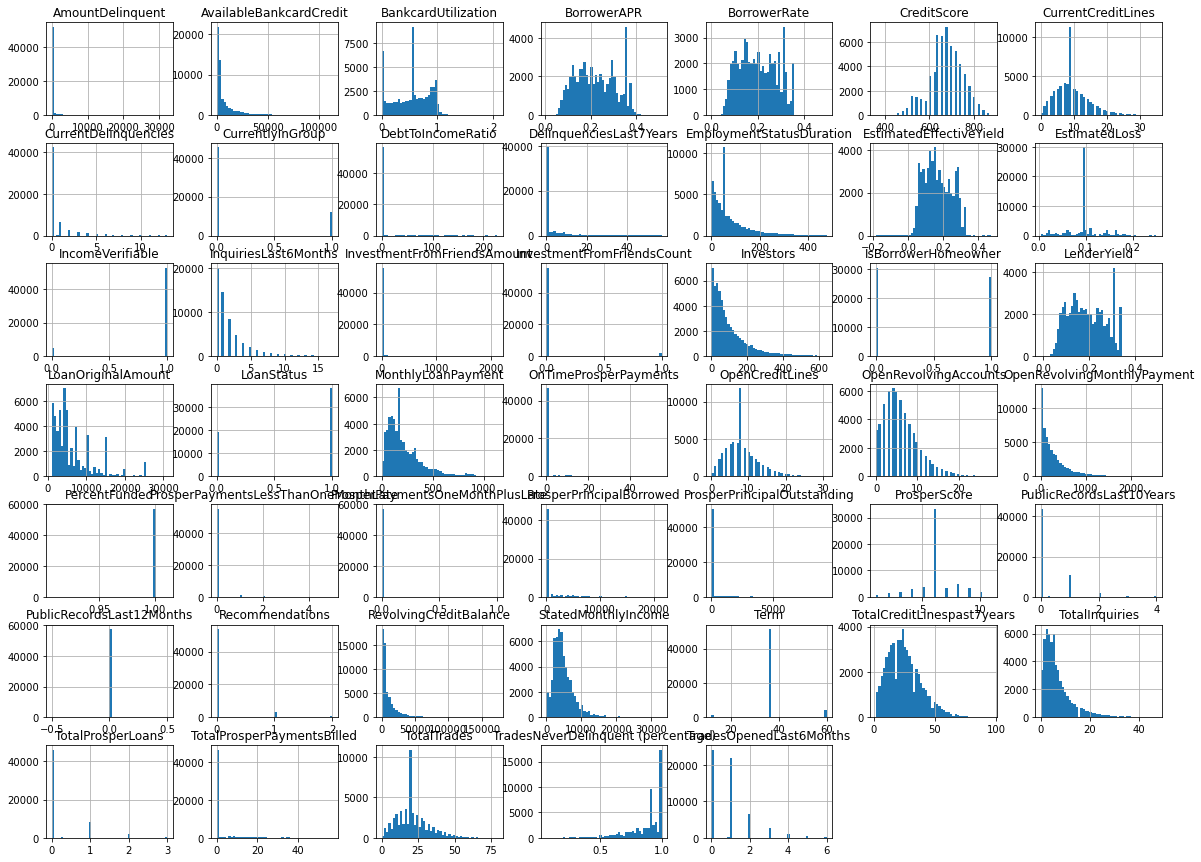

In [65]:
# plotting again the distribution of the numeric features to see if the removal of outliers has smoothened the distribuitons

bool_col = [i for i in df.columns if type(df[i][0]) == np.bool_]
non_bool_col = [i for i in df.columns if type(df[i][0]) != np.bool_]
cat_col = [i for i in df.columns if type(df[i][0]) == str]

df.loc[:, non_bool_col].hist(bins=50, figsize=(20,15))

plt.show()

In the chart we see improvements in the distributions of some features, however, it seems that quite a few of those features are of categorical natures with only a few diffferent categories.</br>
Hence, by removing the outliers we have removed some categories.</br>
The procedure needs to be imrpoved and only the features with actual continuous numeric values should be treated by the find_outliers function.

# Analysis of Interest Rates that people have to pay

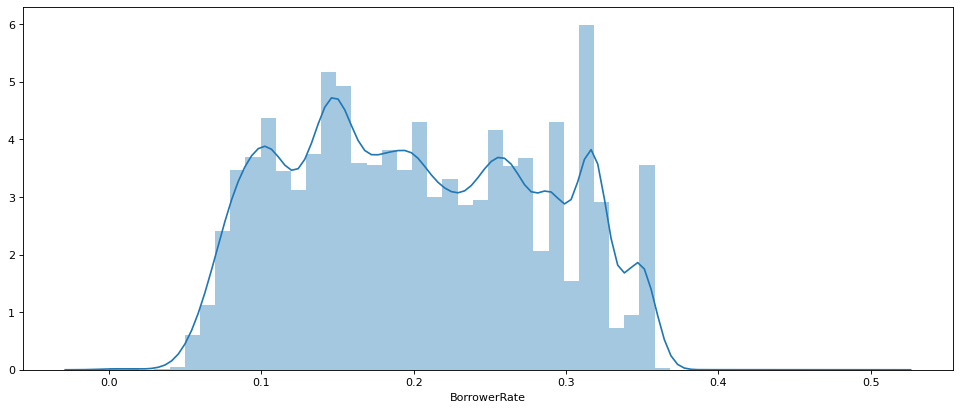

In [66]:
plt.figure(figsize=(15, 6), dpi=80)

sns.distplot(df["BorrowerRate"])

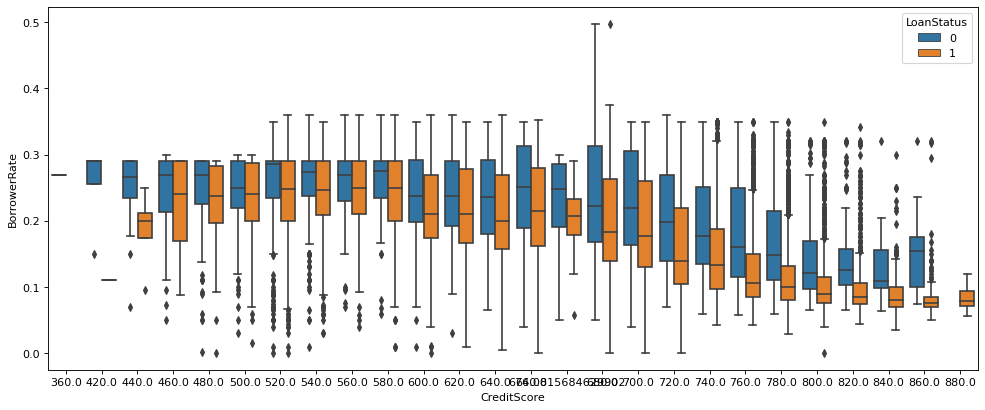

In [67]:
plt.figure(figsize=(15, 6), dpi=80)

sns.boxplot(x="CreditScore", y='BorrowerRate', hue='LoanStatus', data=df)

Generally, loans that default have a higher interest rate than loans that are paid completely, even when controlling for credit score. 

In [68]:
df.isnull().sum()

Term                                   0
LoanStatus                             0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
ProsperScore                           0
ListingCategory                        0
BorrowerState                          0
Occupation                             0
EmploymentStatus                       0
EmploymentStatusDuration               0
IsBorrowerHomeowner                    0
CurrentlyInGroup                       0
CreditScore                            0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57361 entries, 0 to 113935
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Term                                 57361 non-null  int64  
 1   LoanStatus                           57361 non-null  int64  
 2   BorrowerAPR                          57361 non-null  float64
 3   BorrowerRate                         57361 non-null  float64
 4   LenderYield                          57361 non-null  float64
 5   EstimatedEffectiveYield              57361 non-null  float64
 6   EstimatedLoss                        57361 non-null  float64
 7   ProsperScore                         57361 non-null  float64
 8   ListingCategory                      57361 non-null  object 
 9   BorrowerState                        57361 non-null  object 
 10  Occupation                           57361 non-null  object 
 11  EmploymentStatus                